## Mini Project — Statistical Analysis (Tips Dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


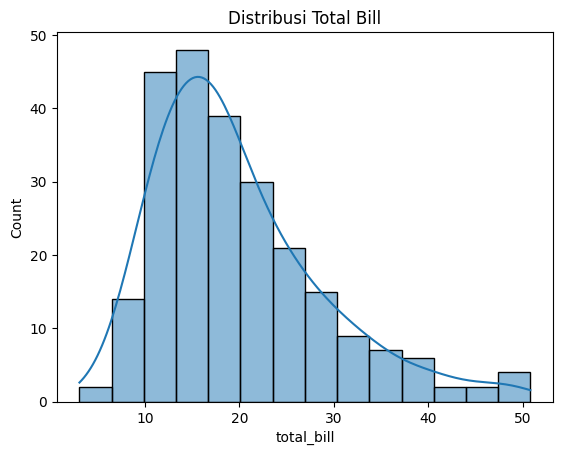

In [3]:
# histogram total bill
sns.histplot(df['total_bill'], kde=True)
plt.title("Distribusi Total Bill")
plt.show()

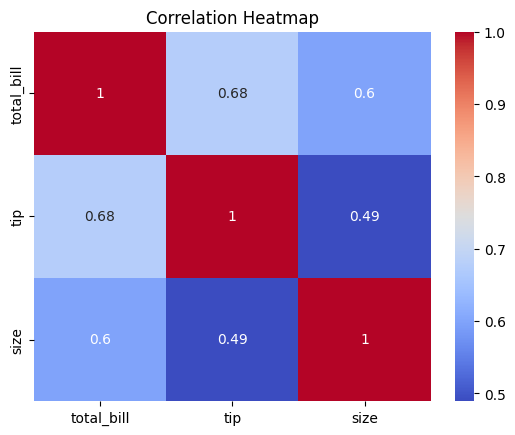

In [4]:
# correlation antar fitur numerik
num_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# hipthesis testing
# apakah tip laki laki tidak sama dengan tip perempuan
male_tips = df[df['sex'] == 'Male']['tip']
female_tips = df[df['sex'] == 'Female']['tip']

t_stat, p_value = ttest_ind(male_tips, female_tips)

print("T-stat:", t_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value <= alpha :
       print("Tolak H0, ada perbedaan antara tip laki laki dan tip perempuan")
else :
       print("Gagal tolak H0, tidak cukup bukti bahwa ada perbedaan antara tip laki laki dan tip perempuan")  

T-stat: 1.387859705421269
P-value: 0.16645623503456755
Gagal tolak H0, tidak cukup bukti bahwa ada perbedaan antara tip laki laki dan tip perempuan


## Project 2 Korelasi Pearson dan Spearman

In [6]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

skor = [2, 4, 6, 7, 8, 10]
nilai = [50, 55, 65, 70, 62, 85]

# hitung pearson dan spearman
r_pearson, p_pearson = pearsonr(skor, nilai)
r_spearman, p_spearman = spearmanr(skor, nilai)

print("Pearson r =", r_pearson, "p-value =", p_pearson)
print("Spearman rho =", r_spearman, "p-value =", p_spearman)

Pearson r = 0.9069053247913901 p-value = 0.01259651980865803
Spearman rho = 0.8285714285714287 p-value = 0.04156268221574334


## Project 3 : T-test (Independent)

In [7]:
import numpy as np
from scipy.stats import ttest_ind

group_a = [60, 62, 58, 65]
group_b = [70, 68, 72, 75]

# hipothesis : apakah rata rata badan A tidak sama dengan badan B
t_stat, p_value = ttest_ind(group_a, group_b)

alpha = 0.05
if p_value <= alpha :
       print("Tolak H0, ada perbedaan antara rata rata badan A dan B")
else :
       print("Gagal Tolak H0, tidak ada bukti bahwa rata rata berbeda")



Tolak H0, ada perbedaan antara rata rata badan A dan B


## Project 5 : Chi -  Square

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

gender = ['L','L','L','P','P','P']
suka =    ['Ya','Tidak','Ya','Ya','Tidak','Tidak']

ct = pd.crosstab(pd.Series(gender,name='gender'), pd.Series(suka,name='suka'))
print("Contingency table:\n", ct)

chi2, p, dof, expected = chi2_contingency(ct)
print("\nChi2 =", chi2, "p-value =", p)
print("Expected frequencies:\n", expected)

Contingency table:
 suka    Tidak  Ya
gender           
L           1   2
P           2   1

Chi2 = 0.0 p-value = 1.0
Expected frequencies:
 [[1.5 1.5]
 [1.5 1.5]]


## Project 6 : Simple Regression

Slope (β1): 4.785714285714285
Intercept (β0): 45.28571428571429
R^2: 0.993141592920354


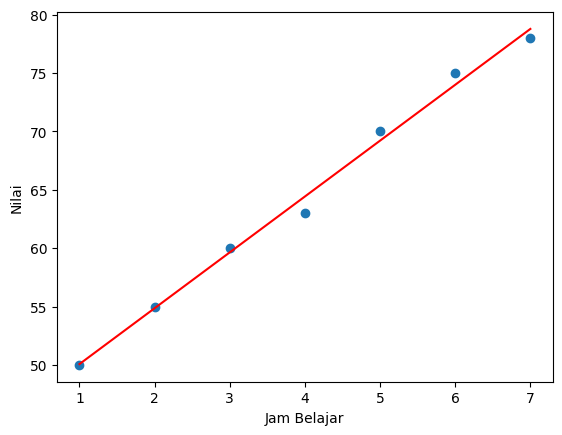

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5,6,7]).reshape(-1,1)
y = np.array([50,55,60,63,70,75,78])

model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print("Slope (β1):", slope)
print("Intercept (β0):", intercept)
print("R^2:", r2)

# optional: plot
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai')
plt.show()
